## Processing Original Image

In [23]:
import cv2 as cv
import numpy as np

lightFieldImage = cv.imread('img_01.png')

### High Pass Filter

In [24]:
highPassFilter = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 1]])

print("Shape of Original Image", lightFieldImage.shape)
print("Shape of High Pass Filter", highPassFilter.shape)

Shape of Original Image (360, 360, 3)
Shape of High Pass Filter (3, 3)


#### Add singleton dimension to High Pass Filter
Since Original image is 3D & High Pass Filter is 2D.

In [25]:
highPassFilter = highPassFilter[:, :, None]
print("Shape of High Pass Filter", highPassFilter.shape)

Shape of High Pass Filter (3, 3, 1)


#### Apply High Pass Filter

In [26]:
from scipy import ndimage

highPassFilteredImage = ndimage.convolve(lightFieldImage, highPassFilter)

#### Remove singleton dimension

In [27]:
highPassFilteredImage = highPassFilteredImage.squeeze()
# cv.imshow("Original Image", lightFieldImage)
# cv.imshow("High Pass Filtered Image", highPassFilteredImage)

#### Original Image
Show the image with matplotlib

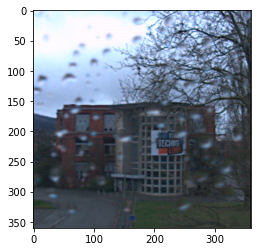

In [28]:
from matplotlib import pyplot as plt

plt.imshow(cv.cvtColor(lightFieldImage, cv.COLOR_BGR2RGB))
plt.show()

#### High Pass Filtered Image

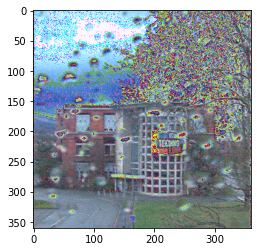

In [29]:
plt.imshow(cv.cvtColor(highPassFilteredImage, cv.COLOR_BGR2RGB))
plt.show()

### Read the depth map image file

In [30]:
depthMapImage = cv.imread('depth_01.png', cv.IMREAD_ANYDEPTH)

### Converting depth map image to its binary form

In [31]:
ret, binaryDepthMapImage = cv.threshold(depthMapImage, 127, 255, cv.THRESH_BINARY)

In [32]:
# Show the image with opencv
# cv.imshow("Original Depth Map Image", depthMapImage)
# cv.imshow("Binary Image of Depth Map Image", binaryDepthMapImage)

#### Original Depth Map Image

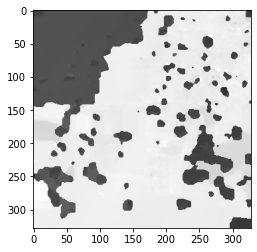

In [33]:
plt.imshow(cv.cvtColor(depthMapImage, cv.COLOR_BGR2RGB))
plt.show()

#### Binary Image of Depth Map Image

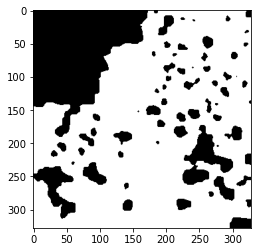

In [34]:
plt.imshow(cv.cvtColor(binaryDepthMapImage, cv.COLOR_BGR2RGB))
plt.show()

### Closing operation

In [35]:
kernel = np.ones((5, 5), np.uint8)
binaryDepthMapImageWithClosing = cv.morphologyEx(binaryDepthMapImage, cv.MORPH_CLOSE, kernel)

# cv.imshow("Binary Image of Depth Map after Closing", binaryDepthMapImageWithClosing)

#### Binary Image of Depth Map after Closing

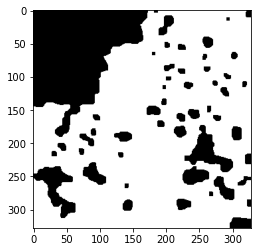

In [36]:
plt.imshow(cv.cvtColor(binaryDepthMapImageWithClosing, cv.COLOR_BGR2RGB))
plt.show()

### Opening Operation

In [37]:
binaryDepthMapImageWithClosingAndOpening = cv.morphologyEx(binaryDepthMapImageWithClosing, cv.MORPH_OPEN, kernel)
# cv.imshow("Binary Image of Depth Map after Closing & Opening", binaryDepthMapImageWithClosingAndOpening)

#### Binary Image of Depth Map after Closing & Opening

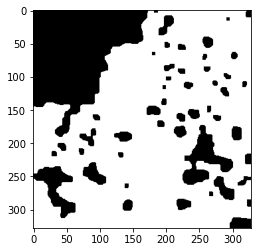

In [38]:
plt.imshow(cv.cvtColor(binaryDepthMapImageWithClosingAndOpening, cv.COLOR_BGR2RGB))
plt.show()

### Erosion Operation

In [39]:
binaryDepthMapImageWithClosingOpeningAndErosion = cv.erode(binaryDepthMapImageWithClosingAndOpening, kernel,
                                                           iterations=1)
# cv.imshow("Binary Image of Depth Map after Closing, Opening & Erosion", binaryDepthMapImageWithClosingOpeningAndErosion)

#### Binary Image of Depth Map after Closing, Opening & Erosion

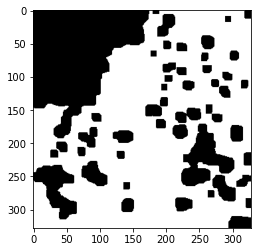

In [40]:
plt.imshow(cv.cvtColor(binaryDepthMapImageWithClosingOpeningAndErosion, cv.COLOR_BGR2RGB))
plt.show()

### Resizing High Pass Filtered Image

In [41]:
binaryDepthMapImageWithClosingOpeningAndErosionHeight, binaryDepthMapImageWithClosingOpeningAndErosionWidth = binaryDepthMapImageWithClosingOpeningAndErosion.shape[
                                                                                                              :2]

resizedHighPassFilteredImage = cv.resize(highPassFilteredImage, (
    binaryDepthMapImageWithClosingOpeningAndErosionWidth, binaryDepthMapImageWithClosingOpeningAndErosionHeight),
                                         interpolation=cv.INTER_AREA)
# cv.imshow("High Pass Filtered Image after Resize", resizedHighPassFilteredImage)

#### High Pass Filtered Image after Resize

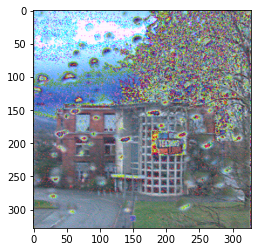

In [42]:
plt.imshow(cv.cvtColor(resizedHighPassFilteredImage, cv.COLOR_BGR2RGB))
plt.show()

### Apply Mask

In [43]:
maskedHighPassFilteredImage = cv.bitwise_and(resizedHighPassFilteredImage, resizedHighPassFilteredImage,
                                             mask=binaryDepthMapImageWithClosingOpeningAndErosion)
# cv.imshow("Resized High Pass Filtered Image after Masking", maskedHighPassFilteredImage)

#### Resized High Pass Filtered Image after Masking

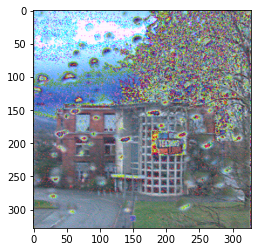

In [44]:
plt.imshow(cv.cvtColor(resizedHighPassFilteredImage, cv.COLOR_BGR2RGB))
plt.show()

#### Saving the image - Using cv2.imwrite()

In [45]:
cv.imwrite('resizedHighPassFilteredImage_01.png', resizedHighPassFilteredImage)
cv.imwrite('binaryDepthMapImageWithClosingOpeningAndErosion_01.png', binaryDepthMapImageWithClosingOpeningAndErosion)
cv.imwrite('maskedHighPassFilteredImage_01.png', maskedHighPassFilteredImage)

# cv.waitKey(0)
# cv.destroyAllWindows()


True